In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np
from time import time

# 使用tensorflow自带的数据集
mnist=input_data.read_data_sets("MNIST_data",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
# 设置每次批次的数量
batch_size = 1
batch_count = mnist.train.num_examples // batch_size

# 定义初始化两个placeholder初始化自变量,用来存放x和y的真实值
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])

# 初始化随机数W和b
W = tf.Variable(tf.random_gamma([784,10],1))
b = tf.Variable(tf.random_gamma([10],1))
# W = tf.Variable(tf.zeros([784,10]))
# b = tf.Variable(tf.zeros([10]))
# theta = tf.Variable(tf.matmul(x,W) + b)
# 创建softmax函数
y_pred = tf.nn.softmax(tf.matmul(x,W) + b)

# 初始化变量
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [3]:
# 定义交叉熵损失函数
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=tf.matmul(x,W) + b,labels=y_pred))
# 梯度下降法
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

# 开始迭代寻找最优解
MAX_ITER = 3000

# 存放预测的结果
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_pred,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

#存放预测结果与真值的距离
W_all = []
b_all = []
accuracy_all = []
starttime = time()
for i in range(1000):
    done = False
    for batch in range(batch_count):
        batch_xs,batch_ys = mnist.train.next_batch(batch_size)
        sess.run(train_step,feed_dict={x:batch_xs,y_pred:batch_ys})
        W_all.append(W.eval())
        b_all.append(b.eval())
        acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
        accuracy_all.append(acc)
        print("Iteration ",i*batch_size+batch," accuracy ",acc)
        if i*batch_count+batch > 2000:
            done = True
            break;
    if done:
        break
stoptime = time()
print(str(stoptime-starttime) + "秒")

Iteration  0  accuracy  0.1358
Iteration  1  accuracy  0.1262
Iteration  2  accuracy  0.1275
Iteration  3  accuracy  0.1377
Iteration  4  accuracy  0.1564
Iteration  5  accuracy  0.156
Iteration  6  accuracy  0.1545
Iteration  7  accuracy  0.146
Iteration  8  accuracy  0.1516
Iteration  9  accuracy  0.149
Iteration  10  accuracy  0.1544
Iteration  11  accuracy  0.1675
Iteration  12  accuracy  0.1805
Iteration  13  accuracy  0.1771
Iteration  14  accuracy  0.1835
Iteration  15  accuracy  0.1619
Iteration  16  accuracy  0.1538
Iteration  17  accuracy  0.1583
Iteration  18  accuracy  0.1592
Iteration  19  accuracy  0.1662
Iteration  20  accuracy  0.1773
Iteration  21  accuracy  0.1792
Iteration  22  accuracy  0.1903
Iteration  23  accuracy  0.1897
Iteration  24  accuracy  0.1967
Iteration  25  accuracy  0.1912
Iteration  26  accuracy  0.1976
Iteration  27  accuracy  0.2083
Iteration  28  accuracy  0.2086
Iteration  29  accuracy  0.2101
Iteration  30  accuracy  0.2212
Iteration  31  accura

Iteration  254  accuracy  0.558
Iteration  255  accuracy  0.558
Iteration  256  accuracy  0.5721
Iteration  257  accuracy  0.5721
Iteration  258  accuracy  0.5777
Iteration  259  accuracy  0.5539
Iteration  260  accuracy  0.5539
Iteration  261  accuracy  0.5878
Iteration  262  accuracy  0.581
Iteration  263  accuracy  0.5808
Iteration  264  accuracy  0.5808
Iteration  265  accuracy  0.5724
Iteration  266  accuracy  0.5759
Iteration  267  accuracy  0.5643
Iteration  268  accuracy  0.5786
Iteration  269  accuracy  0.5786
Iteration  270  accuracy  0.5704
Iteration  271  accuracy  0.5679
Iteration  272  accuracy  0.5679
Iteration  273  accuracy  0.5686
Iteration  274  accuracy  0.5686
Iteration  275  accuracy  0.5826
Iteration  276  accuracy  0.5826
Iteration  277  accuracy  0.5916
Iteration  278  accuracy  0.5916
Iteration  279  accuracy  0.6095
Iteration  280  accuracy  0.6023
Iteration  281  accuracy  0.6023
Iteration  282  accuracy  0.6007
Iteration  283  accuracy  0.6007
Iteration  28

Iteration  516  accuracy  0.6692
Iteration  517  accuracy  0.6697
Iteration  518  accuracy  0.6829
Iteration  519  accuracy  0.6829
Iteration  520  accuracy  0.6829
Iteration  521  accuracy  0.682
Iteration  522  accuracy  0.682
Iteration  523  accuracy  0.6827
Iteration  524  accuracy  0.6781
Iteration  525  accuracy  0.6829
Iteration  526  accuracy  0.6829
Iteration  527  accuracy  0.6735
Iteration  528  accuracy  0.6734
Iteration  529  accuracy  0.6734
Iteration  530  accuracy  0.6734
Iteration  531  accuracy  0.6734
Iteration  532  accuracy  0.6739
Iteration  533  accuracy  0.674
Iteration  534  accuracy  0.6739
Iteration  535  accuracy  0.6594
Iteration  536  accuracy  0.6214
Iteration  537  accuracy  0.6216
Iteration  538  accuracy  0.6214
Iteration  539  accuracy  0.6364
Iteration  540  accuracy  0.6362
Iteration  541  accuracy  0.6362
Iteration  542  accuracy  0.6362
Iteration  543  accuracy  0.6375
Iteration  544  accuracy  0.6375
Iteration  545  accuracy  0.638
Iteration  546

Iteration  766  accuracy  0.7243
Iteration  767  accuracy  0.7116
Iteration  768  accuracy  0.7116
Iteration  769  accuracy  0.7116
Iteration  770  accuracy  0.7166
Iteration  771  accuracy  0.7166
Iteration  772  accuracy  0.7166
Iteration  773  accuracy  0.7166
Iteration  774  accuracy  0.7166
Iteration  775  accuracy  0.7166
Iteration  776  accuracy  0.7167
Iteration  777  accuracy  0.7136
Iteration  778  accuracy  0.6887
Iteration  779  accuracy  0.6956
Iteration  780  accuracy  0.6956
Iteration  781  accuracy  0.6953
Iteration  782  accuracy  0.6754
Iteration  783  accuracy  0.6754
Iteration  784  accuracy  0.6924
Iteration  785  accuracy  0.6924
Iteration  786  accuracy  0.69
Iteration  787  accuracy  0.69
Iteration  788  accuracy  0.6696
Iteration  789  accuracy  0.6692
Iteration  790  accuracy  0.6815
Iteration  791  accuracy  0.6815
Iteration  792  accuracy  0.6813
Iteration  793  accuracy  0.7053
Iteration  794  accuracy  0.7145
Iteration  795  accuracy  0.7145
Iteration  796

Iteration  1031  accuracy  0.7376
Iteration  1032  accuracy  0.7658
Iteration  1033  accuracy  0.7685
Iteration  1034  accuracy  0.7685
Iteration  1035  accuracy  0.7685
Iteration  1036  accuracy  0.7685
Iteration  1037  accuracy  0.7685
Iteration  1038  accuracy  0.7685
Iteration  1039  accuracy  0.765
Iteration  1040  accuracy  0.7649
Iteration  1041  accuracy  0.7649
Iteration  1042  accuracy  0.7649
Iteration  1043  accuracy  0.7647
Iteration  1044  accuracy  0.7647
Iteration  1045  accuracy  0.764
Iteration  1046  accuracy  0.7113
Iteration  1047  accuracy  0.7185
Iteration  1048  accuracy  0.7484
Iteration  1049  accuracy  0.7357
Iteration  1050  accuracy  0.7357
Iteration  1051  accuracy  0.7357
Iteration  1052  accuracy  0.7762
Iteration  1053  accuracy  0.7588
Iteration  1054  accuracy  0.7588
Iteration  1055  accuracy  0.7735
Iteration  1056  accuracy  0.7735
Iteration  1057  accuracy  0.7735
Iteration  1058  accuracy  0.7735
Iteration  1059  accuracy  0.7735
Iteration  1060 

Iteration  1284  accuracy  0.7782
Iteration  1285  accuracy  0.7782
Iteration  1286  accuracy  0.7782
Iteration  1287  accuracy  0.7782
Iteration  1288  accuracy  0.7782
Iteration  1289  accuracy  0.7782
Iteration  1290  accuracy  0.7797
Iteration  1291  accuracy  0.7797
Iteration  1292  accuracy  0.7797
Iteration  1293  accuracy  0.7803
Iteration  1294  accuracy  0.7651
Iteration  1295  accuracy  0.7785
Iteration  1296  accuracy  0.7424
Iteration  1297  accuracy  0.7424
Iteration  1298  accuracy  0.7424
Iteration  1299  accuracy  0.7424
Iteration  1300  accuracy  0.7424
Iteration  1301  accuracy  0.7424
Iteration  1302  accuracy  0.7425
Iteration  1303  accuracy  0.7425
Iteration  1304  accuracy  0.7425
Iteration  1305  accuracy  0.7454
Iteration  1306  accuracy  0.7455
Iteration  1307  accuracy  0.7158
Iteration  1308  accuracy  0.7156
Iteration  1309  accuracy  0.7156
Iteration  1310  accuracy  0.7219
Iteration  1311  accuracy  0.7218
Iteration  1312  accuracy  0.7219
Iteration  131

Iteration  1542  accuracy  0.7264
Iteration  1543  accuracy  0.7264
Iteration  1544  accuracy  0.7264
Iteration  1545  accuracy  0.7201
Iteration  1546  accuracy  0.7201
Iteration  1547  accuracy  0.7201
Iteration  1548  accuracy  0.7201
Iteration  1549  accuracy  0.7201
Iteration  1550  accuracy  0.7201
Iteration  1551  accuracy  0.6918
Iteration  1552  accuracy  0.7095
Iteration  1553  accuracy  0.7452
Iteration  1554  accuracy  0.7452
Iteration  1555  accuracy  0.7452
Iteration  1556  accuracy  0.7452
Iteration  1557  accuracy  0.7452
Iteration  1558  accuracy  0.7452
Iteration  1559  accuracy  0.7452
Iteration  1560  accuracy  0.7452
Iteration  1561  accuracy  0.7452
Iteration  1562  accuracy  0.7512
Iteration  1563  accuracy  0.7512
Iteration  1564  accuracy  0.7512
Iteration  1565  accuracy  0.7512
Iteration  1566  accuracy  0.7512
Iteration  1567  accuracy  0.7513
Iteration  1568  accuracy  0.7514
Iteration  1569  accuracy  0.7354
Iteration  1570  accuracy  0.7504
Iteration  157

Iteration  1797  accuracy  0.8053
Iteration  1798  accuracy  0.8053
Iteration  1799  accuracy  0.8053
Iteration  1800  accuracy  0.8053
Iteration  1801  accuracy  0.8029
Iteration  1802  accuracy  0.8029
Iteration  1803  accuracy  0.8029
Iteration  1804  accuracy  0.8029
Iteration  1805  accuracy  0.8029
Iteration  1806  accuracy  0.803
Iteration  1807  accuracy  0.803
Iteration  1808  accuracy  0.7959
Iteration  1809  accuracy  0.8101
Iteration  1810  accuracy  0.8101
Iteration  1811  accuracy  0.8026
Iteration  1812  accuracy  0.7926
Iteration  1813  accuracy  0.7926
Iteration  1814  accuracy  0.7926
Iteration  1815  accuracy  0.8056
Iteration  1816  accuracy  0.8056
Iteration  1817  accuracy  0.8056
Iteration  1818  accuracy  0.8113
Iteration  1819  accuracy  0.8113
Iteration  1820  accuracy  0.8113
Iteration  1821  accuracy  0.8113
Iteration  1822  accuracy  0.8113
Iteration  1823  accuracy  0.8113
Iteration  1824  accuracy  0.8137
Iteration  1825  accuracy  0.8137
Iteration  1826 

In [4]:
def normalize(image_in):
    m, n = image_in.shape
    Dmax = image_in.max()
    Dmin = image_in.min()
    Dlen = Dmax - Dmin
    image_out = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            image_out[i][j] = np.uint8(255 * (image_in[i][j] - Dmin) / Dlen)
    return image_out

In [5]:
W_val = np.array(W.eval()).T
tmp = W_val[0].reshape([28,28])
tmp = np.uint8(normalize(tmp))
from PIL import Image
im = Image.fromarray(tmp,'L')
im

# 画出曲线

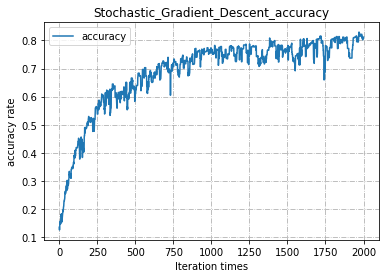

In [6]:
plt.cla()
plt.title("Stochastic_Gradient_Descent_accuracy")
plt.plot(accuracy_all,label='accuracy')
plt.grid(axis='x', linestyle='-.')
plt.grid(axis='y', linestyle='-.')
plt.xlabel("Iteration times")
plt.ylabel("accuracy rate")
plt.legend()
# plt.show()
plt.savefig("Stochastic_Gradient_Descent_accuracy")

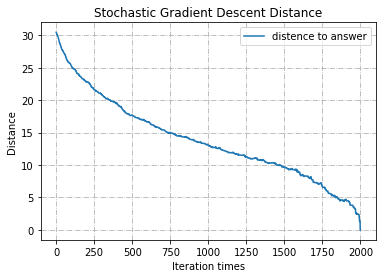

In [7]:
dist_w = []
for i in range(len(W_all)):
    dist_w.append(tf.linalg.norm(W_all[i]-W.eval()).eval())
    
plt.cla()
plt.title("Stochastic Gradient Descent Distance")
plt.plot(dist_w,label = 'distence to answer')
plt.grid(axis = 'x', linestyle = '-.')
plt.grid(axis = 'y', linestyle = '-.')
plt.xlabel("Iteration times")
plt.ylabel("Distance")
plt.legend()
# plt.show()
plt.savefig("Stochastic_Gradient_Descent_Distance")

In [9]:
mnist.train.num_examples

55000